In [8]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns


In [9]:
from sklearn.datasets import load_boston
boston=load_boston()

In [10]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [11]:
print(boston.data.shape)

(506, 13)


In [12]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
bos=pd.DataFrame(boston.data)

In [15]:
#including the columns
bos.columns=boston.feature_names

In [16]:
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [17]:
print(boston.target.shape)

(506,)


In [18]:
bos['Price']=boston.target

In [19]:
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [20]:
import matplotlib.pyplot as plt

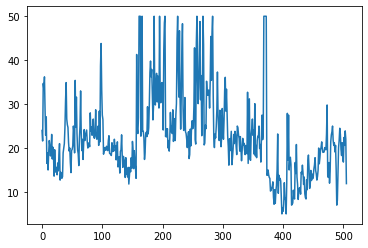

In [21]:
plt.plot(bos.Price)
plt.show()

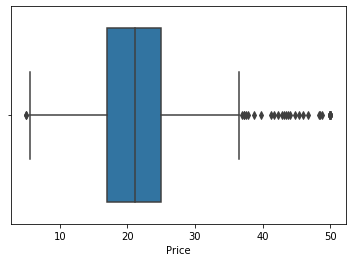

In [22]:
sns.boxplot(bos.Price)
plt.show()

In [23]:
Q1=bos['Price'].quantile(0.25)
Q3=bos['Price'].quantile(0.75)
IQR=Q3-Q1
IQR

7.975000000000001

In [24]:
Q3+1.5*IQR

36.962500000000006

In [25]:
Q1-1.5*IQR

5.0624999999999964

In [26]:
bosiqr=bos[~((bos['Price']<(Q1-1.5*IQR)) | (bos['Price']>(Q3+1.5*IQR)))]

In [27]:
bosiqr.shape

(466, 14)

In [28]:
bos.shape

(506, 14)

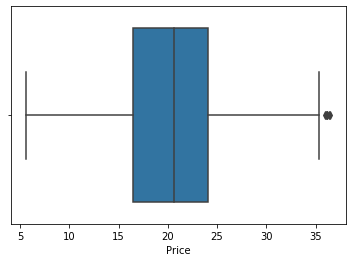

In [29]:
sns.boxplot(bosiqr.Price)

In [30]:
#df=bos[bos['Price']>37]

In [31]:
#df.shape

(37, 14)

In [32]:
#df1=bos[bos['Price']<37]

In [33]:
#df1.shape

(468, 14)

# Linear Regression Model Fitting(Using Train Test Split Method)

### 1st Condition

Here we are taking all the columns in x and the target column ie price in y.
Then we fit(x,y) in Linear Regression().
for Y_predict we x
for accuracy we use r2score(y,y_predict)

In [34]:
bos.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [35]:
x=bos[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values

In [36]:
y=bos['Price'].values

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
reg1=LinearRegression()

In [39]:
reg1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
reg1.score(x,y) #accuracy

0.7406426641094095

In [41]:
y_predict1=reg1.predict(x)

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2score1=r2_score(y,y_predict1)

In [44]:
r2score1

0.7406426641094095

### 2nd Condition

Here we fit(x_train,y_train) and find y_predict(x_train)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [47]:
reg2=LinearRegression()

In [48]:
reg2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_predict2=reg2.predict(x_train)

In [50]:
r2score2=r2_score(y_train,y_predict2)

In [51]:
r2score2

0.7697699488741149

In [52]:
reg2.score(x_train,y_train)

0.7697699488741149

### 3rd Condition

traditional approch ie predict using x_test

In [53]:
y_predict3=reg2.predict(x_test)

In [54]:
r2score3=r2_score(y_test,y_predict3)

In [55]:
r2score3

0.6354638433202129

In [56]:
#a=reg1.score(x_test,y_test)

### Report

In [57]:
print('R2->fit(x,y)->\t\tx\t= ',r2score1)
print('R2->fit(x_train,y_train)->x_train=',r2score2)
print('R2->fit(x_train,y_train)->x_test=',r2score3)

R2->fit(x,y)->		x	=  0.7406426641094095
R2->fit(x_train,y_train)->x_train= 0.7697699488741149
R2->fit(x_train,y_train)->x_test= 0.6354638433202129


In [58]:
bos.shape

(506, 14)

24-10-2019

# Biased VarianceTrade off

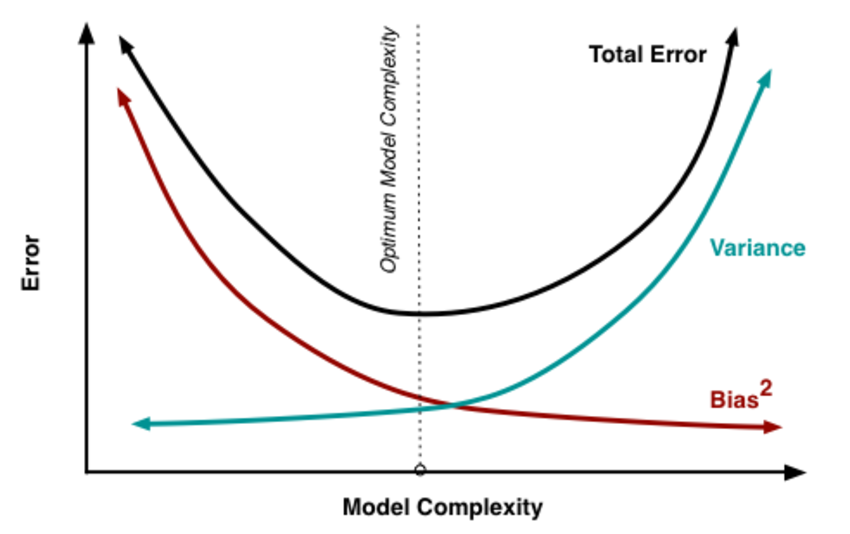

BIAS => How the data behaves on Training Set

VARIANCE=> How the data behaves on Different Sets or Test Set

Error => Observed(Actual) - Predicted 

Two Main Conditions on The Basis of Model Complexity

In [11]:
df=pd.DataFrame([['Low','High','Low'],['High','Low','High']],columns=['','Bias','Vaiance'],index=['Model_Complexity','Model_Complexity'])
df

,,Bias,Vaiance
Model_Complexity,Low,High,Low
Model_Complexity,High,Low,High


## Overfitting and Underfitting

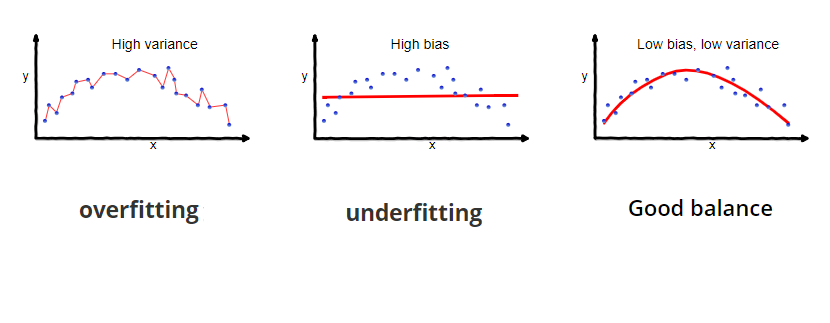

OVERFITTING => It is a condition when your data is specifically designed with respect to the Training data or your model tries to capture every data value of the data set even if it is a noise.Hence these models have LOW BIAS and HIGH VARIANCE.

UNDERFITTING => When the model is unable to capture the given pattern of data. These models generally have high bias and low variance. It happens generally when we have less amount of data or in linear regression it will take place when we try to fot a non-linear data to it.

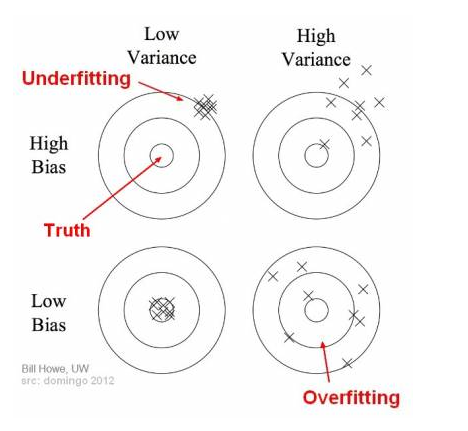

We want LOW Bias and LOW Variance

# OLS Model (2nd Method of fiiting linear regression model)

In [60]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

x consists of independent variables

In [ ]:
X=bos['LSTAT']
y=bos['Price']

In [ ]:
x consists of independent variables.
y is the target column or feature ie dependent variable

In [62]:
#X.head()

In [63]:
#X_constant.head()

In [64]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

Here we are fitting the OLS model with onle one feature in x i.e., LSTAT

In [65]:
X_constant=sm.add_constant(X)  #adding constant to the x variable
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           5.08e-88
Time:                        08:24:00   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X=bos.drop(['Price'],axis=1)
y=bos['Price']

In [67]:
X.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [68]:
y.head(1)

0    24.0
Name: Price, dtype: float64

In [69]:
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 30 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        08:24:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Adjusted r2 formula

R2 adjusted=1-(1-R2)(N-1)/N-p-1

* R-squared measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model. 
* Adjusted R-squared adjusts the statistic based on the number of independent variables in the model.

### Residual(error)

Residual = Actual - Predicted

In [70]:
lin_reg.resid.head()

0   -6.003843
1   -3.425562
2    4.132403
3    4.792964
4    8.256476
dtype: float64

In [71]:
lin_reg.predict(X_constant).head()   #yPredict

0    30.003843
1    25.025562
2    30.567597
3    28.607036
4    27.943524
dtype: float64

In [72]:
y.head()  #residual y-yPredict   (ie actual - predidcted )

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

# Assumptions of Linear Regression

There are 5 basic assumptions of Linear Regression Algorithm:

## 1) AutoCorrelation 

* If the values of a column or feature is correalted with values of that same column then it is said to be auto_correlated
* In other words Correlation within a column.

### Durbin Watson
Durbin-Watson(DW) Test is Generally used to check the Autocorrelation.
* It has a range of 0 to 4
* where 0-2 shows positive Autocorrelation(it have a cyclic graph)
* 2 means NO Autocorrelation
* and 2-4 means Negative Autocorrelation(it shows alternate values in graph)

derbin watson test works well with 1st order AutoCorrelation where as
Brusch-Godfrey test for(2,3,4 order)

### Graphical Method to analyse Autocorrelation

In [73]:
import statsmodels.tsa.api as smt

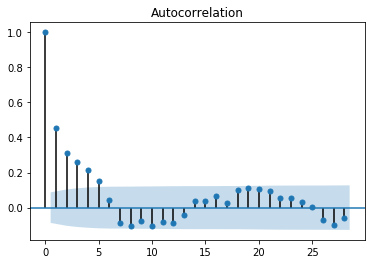

In [74]:
acf=smt.graphics.plot_acf(lin_reg.resid)
acf.show()

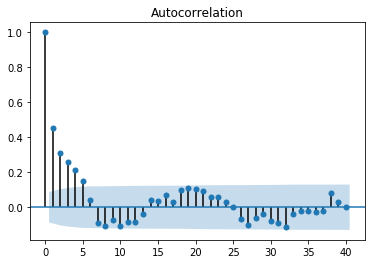

In [75]:
acf=smt.graphics.plot_acf(lin_reg.resid,lags=40)
acf.show()


The above graph is having Positive autocorrln as it is having cyclic graph also dw=1.078


CONCLUSION => DATA WITH NO AUTOCORRELATION IS BEST SUITED

## 2) Normality of Residual

The second assumption is that the error(residuals) follow a normal distribution.

### Graphical Method
Here we will be visually checking normality of distribution plot of residual ie whether it is Normal or Skewed

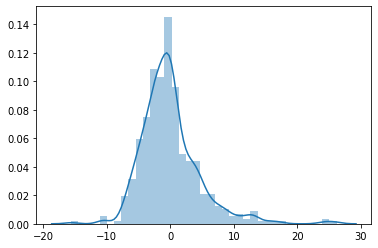

In [77]:
sns.distplot(lin_reg.resid)
plt.show()

### Jarque Bera Test
* This test is for goodness of fit test of whether the sample data have skewness and kurtosis matching to normal ditribution or not.
* Null Hypothesis - Error terms are normally distributed.
* Alternate Hypo  - Error terms are not normally distributed.

In this test we find the Probabilty Value(p-value) of residual and then compare it with  the Significant value(ie 0.05).

Significant Value In Jarque Bera Test is 5.99

* if p value <= 0.05 reject null hypo/acceplt alternate hypo.
* OR contrary if the p value>0.05 then accept Null hypo or do and reject Alternate hypo

In [78]:
from scipy import stats

In [79]:
stats.jarque_bera(lin_reg.resid) #left value is p-value

(783.1262780507673, 0.0)

* Here we will Accept Null hypo because the p-value is greater than significant value (783>5.99).
* It is normal.

In [19]:
#print(stats.jarque_bera(lin_reg.resid)[0])
#0.05 level sinificance is 5.99,therefore if computed values exceeds this value then we will accept null hypothesis

CONCLUSION => WE WANT OUR RESIDUALS TO BE NORMAL

## 3) Linearity

* According to this assumption there is linear relationship between the features and target.
* Linear regression captures only linear relationship.
* This can be validated by plotting a scatter plot between the features and the target.

#### Graphically analysing
#### 1st Method

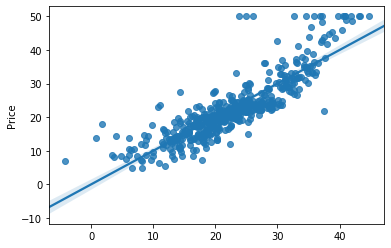

In [81]:
sns.regplot(x=lin_reg.predict(X_constant),y=y)
plt.show()

Here we see whether all the points are  on the line if yes then data is linear

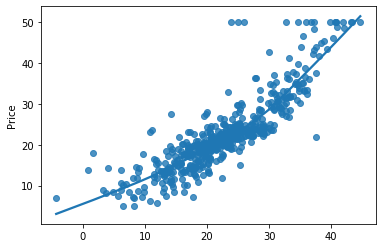

In [82]:
# lowess parameter is used when we want more accuracy in our resultant graph.
sns.regplot(x=lin_reg.predict(X_constant),y=y, lowess=True)
plt.show()  
#if after lowess it is not straight line then non linear

We use lowess parameter when we want more accuracy in deciding whether our data is linear or not. 

#### 2nd Method

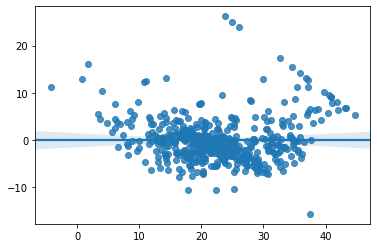

In [83]:
sns.regplot(x=lin_reg.predict(X_constant),y=lin_reg.resid)
plt.show()

From above as it forming a straight line on which most of the points are lying so linear

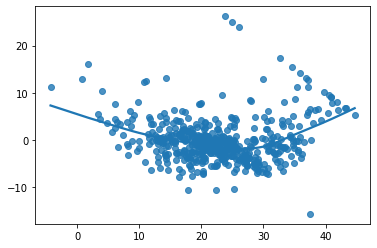

In [84]:
sns.regplot(x=lin_reg.predict(X_constant),y=lin_reg.resid,lowess=True)
plt.show()

### Rainbow Test for Linearity
This test is use for for ckecking the linearity of regression applied.
* Null Hypo - Regression is Linear
* Alternate hypo- Not Linear

In [1]:
import statsmodels.api as sm

In [86]:
sm.stats.diagnostic.linear_rainbow(res=lin_reg) 

#2nd value is p-value

(0.5808507639614254, 0.999988852262534)

Here we will accept the Null hypothesis because Pvalue>0.05

In [87]:
lin_reg.resid.mean()

6.392778269857423e-15

If residual mean is close to 0 then also the regression is linear.

## Homosedacticity Test
* If the variance of the residual are symetricaly distriubted across the residual line then data is said to be homosedactic.
* If the variance is unequal for residual, across the residual line then the data is said to be hetro.In this case the residual can form bow-tie,arrow,or any non-symetric shape.

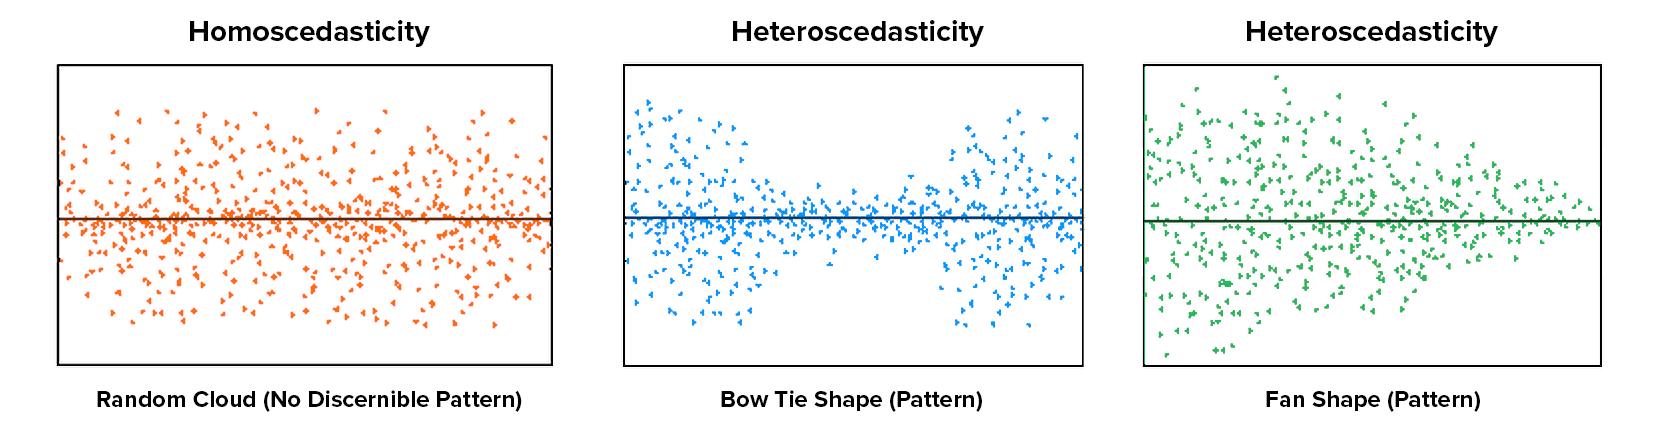

#### Graphical Method to check Homosedacticity
Here we create graph between predicted values and residual values.

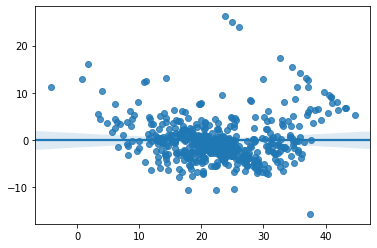

In [92]:
sns.regplot(x=lin_reg.predict(X_constant),y=lin_reg.resid)
plt.show()

### Goldfeld Test or Brusch Vagon Test
* Null hypo(h0) => variance is constant across the range of data(ie Homosedacity)
* Alternate hypo => variance is not constant across the data(ie Hetrosedacity)

In [89]:
import statsmodels.stats.api as sms

In [90]:
sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)   #exog is all of input parameter


(2.431147325349745, 7.302071915608971e-12, 'increasing')

Middle Value is the p-value which is < 0.05 hence we will reject null hypo and accept alternate hypo()

In [91]:
lin_reg.model.exog.shape

(506, 14)

CONCLUSION => we prefer Homosedactic

## Multi Correlinearity
* It is found in multi variant data (when we take more than one column or feature in our x variable ie independent variable)
* It is the Correlation between the predictors or the independent variables
* It's precence can adversely affect your analysis.

There should LOW or NO multi colinearity 

Correlation is not Causation(causation is formulated relationship data for ex: temperature in degree and farenhite)

### Variance Inflation Factor(VIF)
VIF is the quotient of variance in a model of multiple term by the  variance of model with one term.It tells about multi corrlinarity(ie ratio).

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
vif=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])] 

# here firstly, X_constant.shape[1] gives us the number of columns in X_constant for which the no of time the loop will run.
# now each column will get compare with all columns.

In [98]:
vif

[585.2652379423121,
 1.792191547433241,
 2.2987581787494418,
 3.9915964183460315,
 1.0739953275537883,
 4.393719847577493,
 1.9337444357832565,
 3.1008255128153372,
 3.9559449063727263,
 7.484496335274472,
 9.00855394759707,
 1.7990840492488989,
 1.3485210764063753,
 2.9414910780919366]

VIF for each column

In [106]:
df=DataFrame(vif,index=X_constant.columns,columns=['vif'])

In [107]:
df #with outliers

,vif
const,585.265238
CRIM,1.792192
ZN,2.298758
INDUS,3.991596
CHAS,1.073995
NOX,4.393720
RM,1.933744
AGE,3.100826
DIS,3.955945
RAD,7.484496


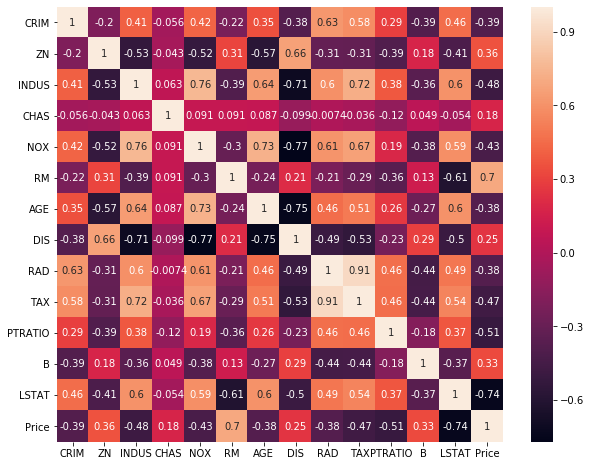

In [115]:
plt.figure(figsize=(10,8))
sns.heatmap(bos.corr(),annot=True)
plt.show()

Now we are droping RAD and TAX as it have high vif and again calculating vif for new x_constant

In [123]:
X_constant.drop(['RAD','TAX'],axis=1,inplace=True)

In [124]:
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     121.0
Date:                Wed, 30 Oct 2019   Prob (F-statistic):          2.00e-132
Time:                        09:36:54   Log-Likelihood:                -1509.7
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     494   BIC:                             3094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.2107      4.893      5.970      0.000      19.597      38.825
CRIM          -0.0614      0.030     -2.019      0.044      -0.121      -0.002
ZN             0.0415      0.014      3.064      0.002       0.015       0.068
INDUS         -0.0458      0.056     -0.819      0.413      -0.156       0.064
CHAS           3.0850      0.872      3.538      0.000       1.372       4.798
NOX          -14.5948      3.670     -3.977      0.000     -21.806      -7.384
RM             4.1343      0.419      9.859      0.000       3.310       4.958
AGE           -0.0043      0.013     -0.320      0.749      -0.031       0.022
DIS           -1.4889      0.203     -7.322      0.000      -1.888      -1.089
PTRATIO       -0.8113      0.122     -6.669      0.000      -1.050      -0.572
B              0.0082      0.003      3.032      0.003       0.003       0.014
LSTAT         -0.5158      0.052     -9.983      0.000      -0.617      -0.414
==============================================================================
Omnibus:                      193.860   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.429
Skew:                           1.628   Prob(JB):                    7.58e-209
Kurtosis:                       8.904   Cond. No.                     9.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
vif=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]

In [126]:
vif

[517.4833104465823,
 1.4782063150025457,
 2.154483313448774,
 3.1791663510857604,
 1.0578052124304222,
 3.9013480675166927,
 1.8725319599275536,
 3.0757552115824787,
 3.9544429220481443,
 1.4960771378586926,
 1.3165585761380987,
 2.9364872964346382]

In [127]:
df1=DataFrame(vif,index=X_constant.columns,columns=['vif'])

In [128]:
df1

,vif
const,517.483310
CRIM,1.478206
ZN,2.154483
INDUS,3.179166
CHAS,1.057805
NOX,3.901348
RM,1.872532
AGE,3.075755
DIS,3.954443
PTRATIO,1.496077


Conclosion => Multicollinearity is a state of very high inter-correlations or inter-associations among the independent variables.It is therefore a type of disturbance in the data if present weakens the statistical power of the regression model.Pair plots and heatmaps(correlation matrix) can be used for identifying highly correlated features.


FOR CHECKING OVERFITTING AND UNDERFITTING(BIAS AND VARIANCE) BIAS 

* If the R2 score of training set is greater that the R2 score of test set, then it said to be overfit.
* And if the R2 score of training set is less than the R2 score of test set, then it said to be underfit.
* WE WANT BOTH R2 SCORES TO BE NEARLY EQUAL

In [136]:
x=bos[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','PTRATIO','B','LSTAT']].values

In [137]:
y=bos['Price'].values

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [140]:
reg1=LinearRegression()

In [141]:
reg1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
y_predict1=reg1.predict(x_train)

In [144]:
r2score1=r2_score(y_train,y_predict1)

In [145]:
r2score1

0.7628198353781434

In [146]:
y_predict2=reg1.predict(x_test)

In [147]:
r2score2=r2_score(y_test,y_predict2)

In [149]:
r2score2

0.6124470685580998

the diffrence is less than below

PR7